# Analysis of reflectometry data
Searching for MHD waves

In [67]:
#import math
from scipy import io
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.integrate
import pandas as pd
from IPython.display import display
import time
import matplotlib.colors as colors
import random
import glob
import os
from matplotlib import animation
from IPython.display import HTML

First, we load our signal.

In [3]:
#%%script false
path ='C:\\Users\\Marci\\Documents\\transientwaves\\imputdata\\in\\'#pc
#path ='C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\in\\'#laptop

#for filename in glob.glob(os.path.join(path, '*.sav')):
#    sav1 = io.readsav(filename, python_dict = True)
#    print('Loaded: '+filename)
#    print('\n')
    
for filename in glob.glob(os.path.join(path, '*.mat')):
    sav1 = io.loadmat(filename)
    print('Loaded: '+filename)
    print('\n')

Loaded: C:\Users\Marci\Documents\transientwaves\imputdata\in\FRSgetter.mat




In [4]:
print(sav1)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Jul 11 10:13:16 2019', '__version__': '1.0', '__globals__': [], 'rho': array([[ 1.17867446,  1.14802825,  1.1466136 , ...,  1.14636946,
         1.14615095,  1.139943  ],
       [ 1.16291106,  1.13847756,  1.13395393, ...,  1.13497019,
         1.13644636,  1.13028455],
       [ 1.14830875,  1.12962592,  1.12192869, ...,  1.12435973,
         1.12721217,  1.12105203],
       ...,
       [ 0.19468252,  0.24896719,  0.1681952 , ..., -0.08006162,
        -0.0712906 , -0.0526837 ],
       [ 0.18837547,  0.24057956,  0.16421349, ..., -0.0637142 ,
        -0.05550419, -0.03764074],
       [ 0.18288769,  0.23291121,  0.16135028, ..., -0.05012153,
        -0.04292789, -0.02810191]]), 't_rho': array([[0.57761067, 0.57810569, 0.57860065, ..., 2.83332562, 2.83382058,
        2.83431578]]), 'R': array([[2.24390531, 2.22200775, 2.22093892, ..., 2.16563058, 2.16543674,
        2.16475081],
       [2.23175001, 2.21486974, 2.2115

In [16]:
#%%script false
#print(sav1)
rho=np.array(sav1['rho'])
t_rho=np.array(sav1['t_rho'])#
ne=np.array(sav1['ne'])
t_ne=np.array(sav1['tne'])
x=np.array(sav1['tne'][0])
#print("\n", s)
#print("\n", sav1['channels'][shot_i])
shot='AUGD '+ '32335' + ' FRS'  #os.path.basename(filename)[:4]+' '+os.path.basename(filename)[5:10]+', '+str(sav1['channels'][shot_i])[2:-1]#sxr_name#
print("\n",shot)


 AUGD 32335 FRS


**main variables**
<br> nyquist - The Nyquist frequency of the signal - biggest recommended calculation range
<br> frangemax - x axis length of Fourier-transform, note, that this does not affect Fourier calculation
<br> 
<br> samples - sample points of the first graph
<br> s_rate - sample rate (Hz)

In [18]:
#%%script false
#s = s.astype(float)
#x = x.astype(float)
samples=ne.size
t=max(x)-min(x)
nyquist=samples/2/t
frangemax=nyquist#250000#
xf=np.linspace(0.0, frangemax, int(frangemax*t+1))
s_rate=x.size/t
print(nyquist)
print(x.size)
view=0

100766.37814372059
4548


The widget below controls the wisible range of the chart under it. Note that this is only for visualisation, the program calculates with the whole 0 - t range. The zooming is exponential. Value 0 displays the whole range.

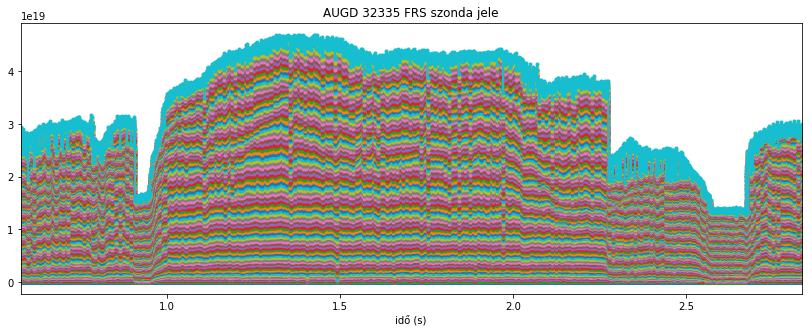


 AUGD 32335 FRS


In [22]:
#%%script false
plt.figure(figsize=(14,5))
plt.title(shot+' szonda jele')
plt.plot(x,ne,'.-')
#yaxismax=1/2**(view.value/12)
plt.xlim(min(x),max(x)-(max(x)-min(x))*((view/100.4)**0.6))
#plt.ylabel('radiális mágneses tér változás (T/s)')
plt.xlabel('idő (s)')
#plt.savefig(shot+' in.pdf')
plt.show()

print("\n",shot)

The script provided at   *augtwiki/bin/view/Reflectometry/Read*   to load reflectometries

(4548, 100)
(4548, 100)


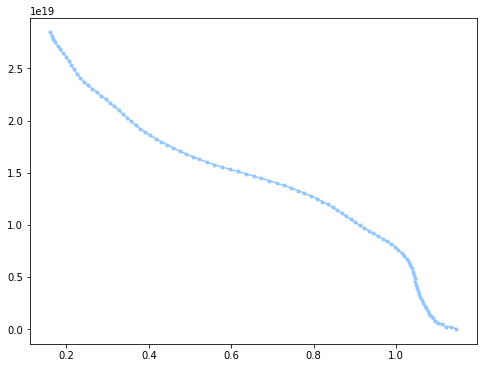

MovieWriter imagemagick unavailable. Trying to use pillow instead.


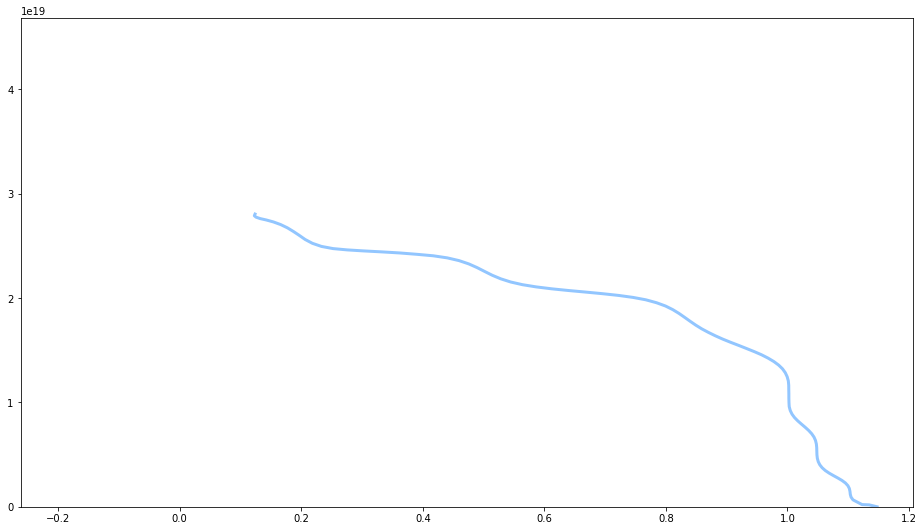

In [65]:
##Read the data
rho2 = np.transpose(rho)

print(rho2.shape)
print(ne.shape)

plt.figure(figsize=(8,6))
plt.plot(rho2[2],ne[2],'.-')#.data[1000,:]
#plt.title('%s @ t=%3.2fs'%(nl.description, time[1000]))
#plt.ylabel(nl.unit)
#plt.xlabel('R [%s]' %(rl.units))
plt.show()

fig = plt.figure(figsize=(16,9))
ax = plt.axes(xlim=(np.min(rho2), np.max(rho2)), ylim=(np.min(ne), np.max(ne)))
line, = plt.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    line.set_data(rho2[i],ne[i])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=100, repeat_delay=1000, repeat=True, blit=True)


anim.save('FRS_profiles.gif', writer='imagemagick')
#https://www.wikihow.com/Install-FFmpeg-on-Windows
#https://stackoverflow.com/questions/20137792/using-ffmpeg-and-ipython

plt.show()

In [70]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

### Trigger and cutting

(300, 8000)
100


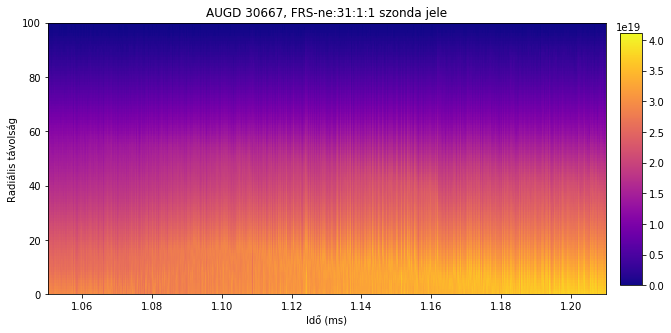

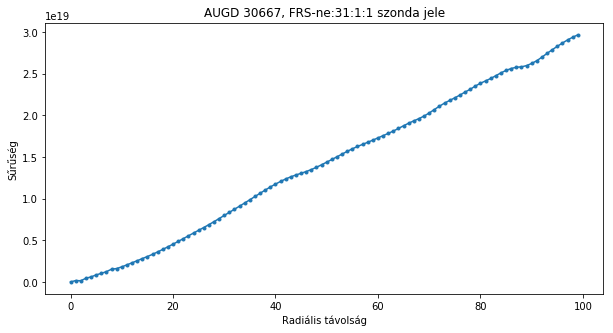

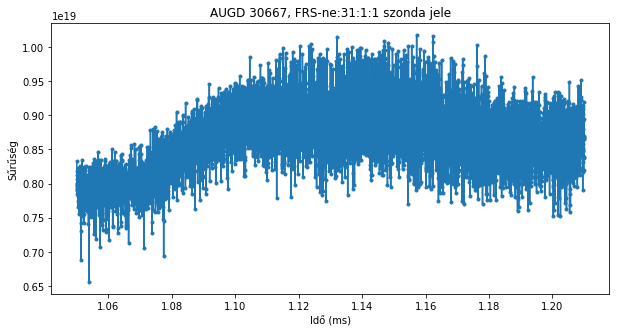

In [23]:
print(sav1['data'].shape)
ne= np.zeros((100,sav1['data'].shape[1]))
freq= np.zeros((100,sav1['data'].shape[1]))
Bmod= np.zeros((100,sav1['data'].shape[1]))
print(ne[:,10].size)

for i in range(100):
    ne[i]= np.array(sav1['data'][i])
    freq[i]= np.array(sav1['data'][shot_i+100])
    Bmod[i]= np.array(sav1['data'][shot_i+200])
    
   

plt.figure(figsize=(10,5))
plt.imshow(ne,aspect='auto',cmap='plasma', extent=[min(x),max(x),0,100])
plt.title(shot+' szonda jele')
plt.xlabel('Idő (ms)')
plt.ylabel('Radiális távolság')
cax = plt.axes([0.92, 0.15, 0.03, 0.7])
plt.colorbar(cax=cax).set_label('')
#plt.subplots_adjust(right=0.95)
#plt.savefig(shot+' fullprofile.pdf')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(ne[:,200],'.-')
plt.title(shot+' szonda jele')
plt.ylabel('Sűrűség')
plt.xlabel('Radiális távolság')
#plt.savefig(shot+' profile 200.pdf')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x,ne[30,:],'.-')
plt.title(shot+' szonda jele')
plt.xlabel('Idő (ms)')
plt.ylabel('Sűrűség')
#plt.savefig(shot+' at freq 30.pdf')
plt.show()

## Short-time Fourier transform

We slice the signal up, then from each slice, we substract its average and multiply it with a gaussian window.

4.330261760059834e+30
1.518215156246576e+38
45


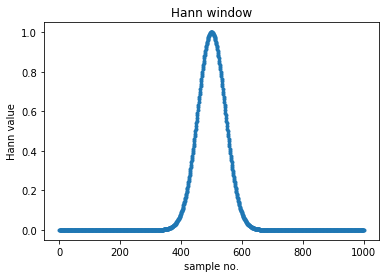

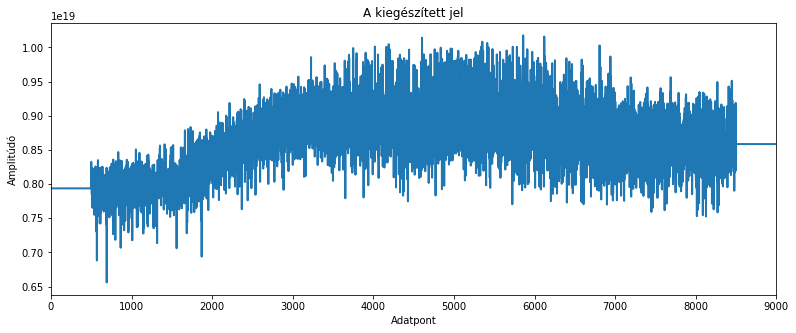

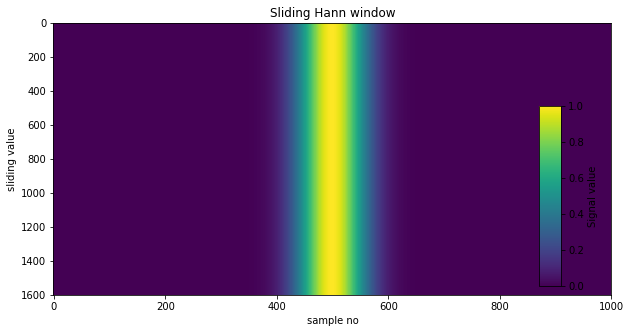

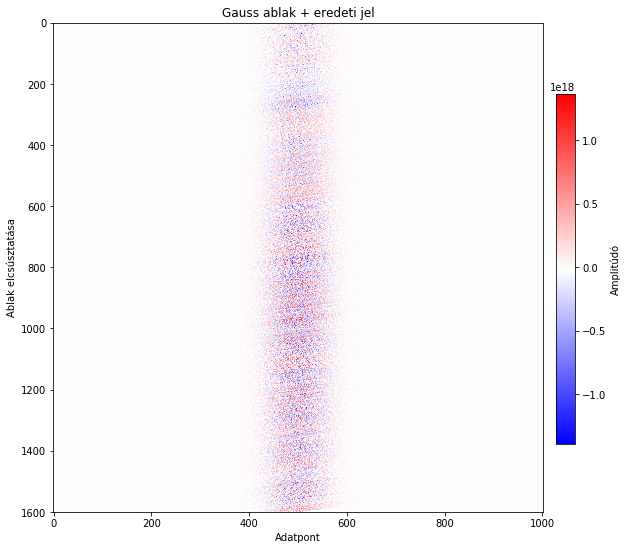

In [24]:
t0=time.time()
win_r = 500 #1000
d_win=5#random.randint(200,300)
std=45 #150
win_base = scipy.signal.gaussian(2*win_r+1, std=std)#np.wining(2*win_r+1)

plt.plot(win_base,".-")
plt.title('Hann window')
plt.xlabel('sample no.')
plt.ylabel('Hann value')
#plt.show()

z_padded_s = np.zeros (samples+2*win_r)
z_0=z_padded_s
z_padded_s[win_r:-win_r] = s
z_padded_s[0:win_r]=np.average(z_padded_s[win_r+1:2*win_r])
z_padded_s[-win_r:]=np.average(z_padded_s[-2*win_r:-win_r-1])
x_win=np.linspace(0.0, t+(2*win_r/s_rate), samples+2*win_r)

plt.figure(figsize=(13,5))
plt.plot(z_padded_s,"-",linewidth = 2)#x_win,idő (s),max(x_win)
plt.xlim((0,samples+2*win_r))
plt.title('A kiegészített jel')
plt.xlabel('Adatpont')
plt.ylabel('Amplitúdó')
plt.savefig('sxr2_p.pdf')
#plt.show()

win = np.zeros((int(samples/d_win+1), 2*win_r+1))
for i in range(int(samples/d_win+1)):
    win [i]=win_base

plt.figure(figsize=(10,5))
plt.imshow(win,aspect='auto')
plt.title('Sliding Hann window')
plt.xlabel('sample no')
plt.ylabel('sliding value')
#plt.subplots_adjust(right=0.95)
cax = plt.axes([0.8, 0.15, 0.03, 0.5])
plt.colorbar(cax=cax).set_label('Signal value')
#plt.show()

z_win = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1]-np.average(z_padded_s [d_win*i:d_win*i+win_r+win_r+1]))
    #z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1])

plt.figure(figsize=(9,9))
plt.imshow(z_win,aspect='auto',cmap='bwr')#, extent=(min(x)*s_rate/d_win,max(x)*s_rate/d_win,max(x)*s_rate,min(x)*s_rate)
plt.title('Gauss ablak + eredeti jel')
plt.xlabel('Adatpont')
plt.ylabel('Ablak elcsúsztatása')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.90, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig('z_win.pdf')
#plt.show()

z_win_fft = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i]))  
t1=time.time()

print(z_win_fft.min()**2)
print(z_win_fft.max()**2)
print(std)

We can plot one of the slices we calculated earlier.

In [25]:
%%script false
print(win_base[0])
print(z_win[45])
plt.figure(figsize=(4,4))
plt.plot(z_win[1258], linewidth = 0.5)#l
plt.title('Gauss ablak+ eredeti je')
plt.xlabel('Adatpont')
plt.ylabel('Amplitúdó')
#plt.savefig('sxr2_1000.pdf')
plt.show()

Couldn't find program: 'false'


In [26]:
%%script false
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot_surface(z_win[:,0],z_win[:,1],z_win[:,2])
plt.show()

Couldn't find program: 'false'


In [27]:
%%script false
t2=time.time()
f_ax_stft, t_ax_stft, z_spy_stft = scipy.signal.stft(s,s_rate,window=win_base, nperseg=hann_r*2+1, noverlap =hann_r*2+1-d_win)
t3=time.time()
print(t1-t0)
print(t3-t2)

Couldn't find program: 'false'


In [28]:
%%script false
z_spy_stft=np.abs(z_spy_stft)**2
z_spy_stft_cutted = np.zeros((int(frangemax*(2*hann_r+1)/s_rate),int(samples/d_win)))#int(frangemax*t+0.01)
for i in range(int(samples/d_win)):
    for j in range(int(frangemax*(2*hann_r+1)/s_rate)):
        z_spy_stft_cutted [j][i] = z_spy_stft [j][i]

Couldn't find program: 'false'


In [29]:
z_win_fft_cutted = np.zeros((int(frangemax*(2*win_r+1)/s_rate), int(samples/d_win)))
for i in range(int(samples/d_win)):
    for j in range(int(frangemax*(2*win_r +1)/s_rate)): #int(frangemax*max(x_hann))
        z_win_fft_cutted [j][i] = z_win_fft [i][j]**2

#print(z_spy_stft.shape)
#print(z_spy_stft_cutted.shape)
print(z_win_fft.shape)
print(z_win_fft_cutted.shape)
#print(z_win_fft.max()/abs(z_spy_stft.max()))

(1600, 1001)
(500, 1600)


We can write the calculated STFT to a text file.

In [30]:
%%script false
file2 = open("stft.txt","a")
for i in range(int(samples/d_win/37.5)):#
    for j in range(int(50000*(2*hann_r+1)/s_rate)):
        j2=int(55000*(2*hann_r+1)/s_rate)
        i2=int(samples/d_win/3+samples/d_win/30)
        file2.write(str(i/10)+"\t"+str(j/10)+"\t"+str(np.log10(z_spy_stft [j+j2][i*10+i2])+3)+"\n")#
print(i,j)
file2.close()

Couldn't find program: 'false'


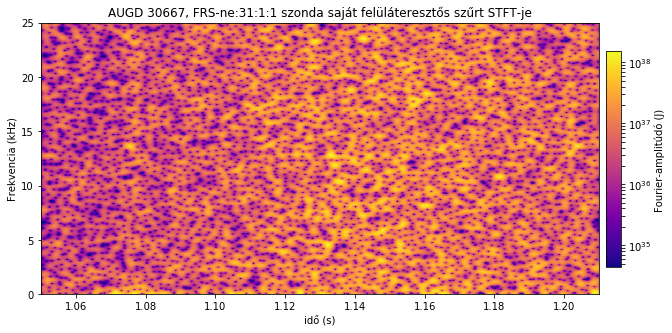

In [31]:
##### %%script false
colornorm=colors.LogNorm(vmin=z_win_fft_cutted.min()*10000, vmax=z_win_fft_cutted.max()/1)
logax = np.linspace(int(np.log10(z_win_fft_cutted.min())),int(np.log10(z_win_fft_cutted.max())),int(np.log10(z_win_fft_cutted.max()))-int(np.log10(z_win_fft_cutted.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(10,5))
#extent=[0,t-(2*hann_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
#ax.plot(x,np.abs(full_f),color='g',linewidth=3,linestyle='dashed',alpha=0.6)#img = ax.
img = plt.imshow(z_win_fft_cutted,cmap='plasma',  aspect='auto', extent=[min(x),max(x),frangemax/1000,0], norm=colornorm)#interpolation='gaussian',*30000000/4
plt.title(shot+' szonda saját felüláteresztős szűrt STFT-je')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')#('time (s)')
#plt.xlim(0.642,0.658)
#plt.ylim(90,30)
plt.subplots_adjust(right=0.90)
plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-amplitúdó (J)')
#plt.axis([2.13,2.15,min(s),20000])
#cbar.set_ticks(logax)
#plt.savefig(shot+' stft.pdf')#34924_40
plt.show()

In [32]:
%%script false
logax = np.linspace(int(np.log10(z_spy_stft_cutted.min())),int(np.log10(z_spy_stft_cutted.max())),int(np.log10(z_spy_stft_cutted.max()))-int(np.log10(z_spy_stft_cutted.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(10,5))
#plt.figure(figsize=(15,10))
#plt.pcolormesh(f_ax, t_ax, np.abs(z_spy_stft), vmin=0, vmax=amp) # extent=[min(x),max(x),frangemax,0],
#ax.plot(x,np.abs(full_f),color='w',linewidth=3,linestyle='dashed')
plt.title('teszt jel szűretlen könyvtári STFT-je')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')
#plt.ylim(140,0)
plt.subplots_adjust(right=0.90)
img2 = ax.imshow(np.abs(z_spy_stft_cutted),cmap='plasma', interpolation='gaussian', aspect='auto',extent=[min(x),max(x),frangemax/1000,0], norm=colors.LogNorm(vmin=z_spy_stft_cutted.min()*1, vmax=z_spy_stft_cutted.max()/2))#)*4000000/800
plt.gca().invert_yaxis() #extent=[min(x),max(x),frangemax,0],
cbar=plt.colorbar(img2,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier value')
#cbar.set_ticks(logax)
plt.savefig('t_stft1.pdf')
plt.show()

print(np.max(z_spy_stft))

Couldn't find program: 'false'


1600.0
50005.3324423812
-28413.19726101533
3.080396845625755e+17


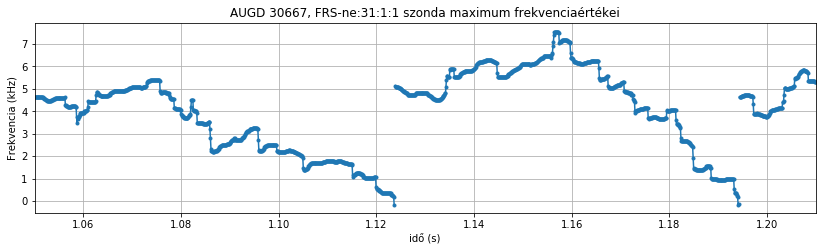

In [48]:
#%%script false
#ridge_no = 1
print(samples/d_win)

print(s_rate-0.9)
print(nyquist/((2*win_r+1)/s_rate-0.9))
ridge_d=2000#50#
ridge_d2=800
ridge_start=4000#2#
ridge = np.zeros(int(samples/d_win+0.9))
ridge_h = np.zeros(int(samples/d_win+0.9))
maxi=z_win_fft.max()/40
print(maxi)

for i in range(int(samples/d_win+0.9)):
    ridgeval=0  #max(z_spy_stft[i][:])
    if (i==0) or (ridge[i-1]==0):
        for j in range(int(ridge_d*(2*win_r+1)/(s_rate-0.9))):
            j2=j+int((ridge_start)*(2*win_r+1)/(s_rate-0.9))
            if ridgeval < z_win_fft[i][j2]:
                ridgeval=z_win_fft[i][j2]
                ridge[i]= j2
    else:
        for j in range(int(ridge_d2*(2*win_r+1)/(s_rate-0.9))):
            j2=int(j+ridge[i-1]-(ridge_d2/2)*(2*win_r+1)/(s_rate-0.9))
            if ridgeval < z_win_fft[i][j2]:
                ridgeval=z_win_fft[i][j2]
                ridge[i]= j2
                #print(j2, z_spy_stft[j2][i])
    if ridgeval<(maxi):
        ridgeval =0
        ridge [i]=0
    ridge_h[i]=ridgeval**(1/2)
    #print(i, ridge [i])
    #print (i,"  ",ridge[i],"\t", ridgeval,"\t", z_spy_stft[i][int(ridge[i])])

ridge=ridge*(s_rate/(2*win_r+1))

#proc_x=np.linspace(min(x),max(x),np.size(ridge))
ridge[ ridge==0 ] = np.nan
plt.figure(figsize=(14,3.5))
plt.title(shot+' szonda maximum frekvenciaértékei')
plt.plot(np.linspace(min(x),max(x),np.size(ridge)),ridge/1000,'.-')
plt.grid(True)
#plt.legend(('Kiszámolt', 'Eredeti'))
#yaxismax=1/2**(view.value/12)
plt.xlim(min(x),max(x))
#plt.ylim(ridge_start/1100,)
#plt.ylim(0,200)
#plt.xlim(0.89,0.91)
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')
#plt.savefig(shot+' f_max.pdf')
plt.show()

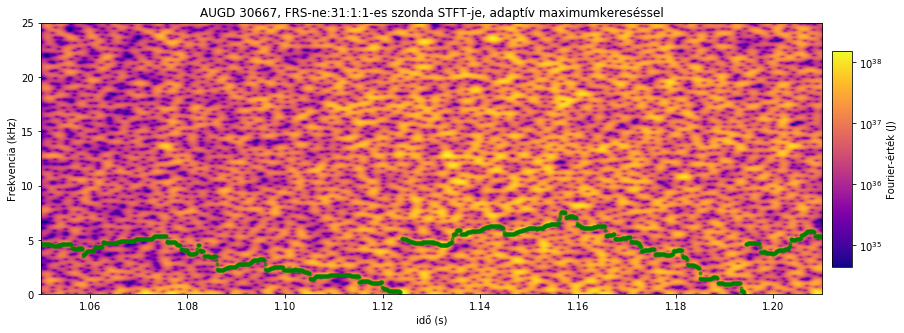

In [54]:
logax = np.linspace(int(np.log10(z_win_fft_cutted.min())),int(np.log10(z_win_fft_cutted.max())),int(np.log10(z_win_fft_cutted.max()))-int(np.log10(z_win_fft_cutted.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(14,5))
#extent=[0,t-(2*hann_r/s_rate),0,frangemax/t],
#plt.figure(figsize=(15,10))
ax.plot(np.linspace(min(x),max(x),np.size(ridge)),ridge/1000,'.',color='g',alpha=0.6)#,linewidth=3,linestyle='dashed')#img = ax.
img = plt.imshow(z_win_fft_cutted,cmap='plasma', interpolation='gaussian', aspect='auto', extent=[min(x),max(x),frangemax/1000,0], norm=colornorm)#
#plt.title('My Short-time Fourier transform')
plt.title(shot+'-es szonda STFT-je, adaptív maximumkereséssel')
plt.ylabel('Frekvencia (kHz)')
plt.xlabel('idő (s)')#('time (s)')
#plt.xlim(0.652,0.66)
#plt.ylim(90,40)
plt.subplots_adjust(right=0.90)
plt.gca().invert_yaxis()
cbar=plt.colorbar(img,cax=plt.axes([0.91, 0.2, 0.02, 0.6]),ticks=None)
cbar.set_label('Fourier-érték (J)')
#plt.axis([2.13,2.15,min(s),20000])
cbar.set_ticks(logax)
#plt.savefig(shot+' stft_max.pdf')
plt.show()

555013229.1779859


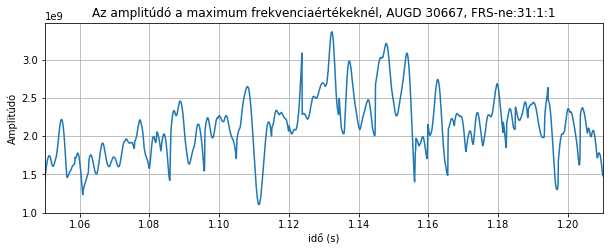

In [59]:
ridge_h[ ridge_h==0 ] = np.nan
print(maxi**(1/2))
plt.figure(figsize=(10,3.5))
plt.title('Az amplitúdó a maximum frekvenciaértékeknél, '+shot)#, AUGD 34924 J051-es szonda
plt.plot(np.linspace(min(x),max(x),np.size(ridge_h)),ridge_h,'-',markersize=1)#,x,3*abs(np.sin(2*np.pi*x))+2,
plt.grid(True)
plt.xlim(min(x),max(x))
#plt.xlim(0.89,0.91)
#plt.ylim(maxi**(1/2)/2,max(ridge_h)*1.05)
plt.ylabel('Amplitúdó')
plt.xlabel('idő (s)')
#plt.yscale("log")
#plt.savefig(shot+'_amp.pdf')
plt.show()